In [59]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

import numpy as np
import matplotlib.pyplot as plt


In [60]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [61]:
X_train.shape

(50000, 32, 32, 3)

In [62]:
X_test.shape

(10000, 32, 32, 3)

In [63]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [64]:
y_train.shape

(50000, 1)

In [65]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [66]:
y_train.shape

(50000,)

In [67]:
class_labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [68]:
def showimage(x,y,index):
    plt.figure(figsize=(2,2))
    plt.imshow(x[index])
    plt.xlabel(class_labels[y[index]])
    plt.show()

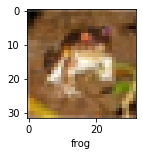

In [69]:
showimage(X_train,y_train,0)

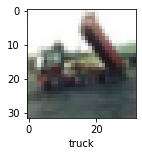

In [70]:
showimage(X_train,y_train,2)

In [71]:
X_train = X_train/255
X_test = X_test/255

In [72]:
ann = tf.keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="softmax")
])

ann.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.9320 - accuracy: 0.3027
Epoch 2/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.6481 - accuracy: 0.4174
Epoch 3/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5501 - accuracy: 0.4516
Epoch 4/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.4930 - accuracy: 0.4731
Epoch 5/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.4436 - accuracy: 0.4907


In [73]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.4944 - accuracy: 0.4664


[1.494425654411316, 0.46639999747276306]

In [74]:
ann.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 3000)              9219000   
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              3001000   
_________________________________________________________________
dense_16 (Dense)             (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [75]:
cnn = tf.keras.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7524 - accuracy: 0.3676
Epoch 2/5
1563/1563 [==============================] - 35s 22ms/step - loss: 1.2017 - accuracy: 0.5805
Epoch 3/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0536 - accuracy: 0.6332
Epoch 4/5
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9494 - accuracy: 0.6737
Epoch 5/5
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8851 - accuracy: 0.69382s - loss: 0.8 - ETA: 2s


In [76]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9365 - accuracy: 0.6771


[0.936451256275177, 0.6771000027656555]

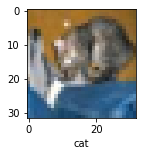

In [77]:
showimage(X_test,y_test,0)

In [78]:
y_pred = cnn.predict(X_test)
y_pred

array([[7.1419450e-04, 2.4524453e-04, 3.3756597e-03, ..., 6.9704500e-04,
        7.2090486e-03, 5.5747892e-04],
       [2.9090542e-02, 2.5451708e-01, 4.5973630e-04, ..., 1.1060324e-06,
        6.9902515e-01, 1.6830195e-02],
       [6.1409995e-02, 1.3271327e-01, 5.7401173e-03, ..., 2.9763821e-04,
        7.4157786e-01, 3.5889041e-02],
       ...,
       [1.3708101e-04, 1.1601545e-05, 1.8402016e-01, ..., 1.3670823e-01,
        1.0874666e-04, 1.4519902e-04],
       [9.4889533e-03, 1.1258642e-01, 3.6933858e-02, ..., 7.8156637e-03,
        2.9512186e-04, 1.3863210e-03],
       [9.7642340e-05, 1.3422815e-04, 1.4454755e-03, ..., 9.4562519e-01,
        4.5945985e-06, 1.6425239e-04]], dtype=float32)

In [79]:
y_classes = [np.argmax(i) for i in y_pred]

In [80]:
y_classes[:5]

[3, 8, 8, 0, 4]

In [81]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

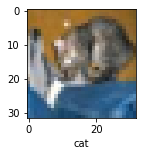

In [82]:
showimage(X_test,y_test,0)

In [83]:
class_labels[y_classes[0]]

'cat'

In [84]:
from sklearn.metrics import classification_report

print("classification report: \n",classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.71      0.74      0.72      1000
           1       0.79      0.80      0.79      1000
           2       0.55      0.58      0.56      1000
           3       0.46      0.60      0.52      1000
           4       0.63      0.63      0.63      1000
           5       0.67      0.42      0.52      1000
           6       0.75      0.76      0.76      1000
           7       0.73      0.75      0.74      1000
           8       0.83      0.70      0.76      1000
           9       0.74      0.80      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

